In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

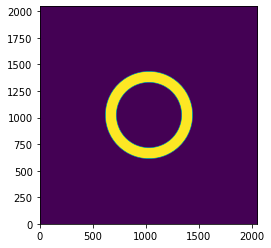

In [3]:
N = 2048

x = np.linspace(-2.0, 2.0, N)
y = x.copy()
x, y = np.meshgrid(x, y)
r = np.hypot(x, y)
theta = np.arctan2(y, x)

ring = (0.6 <= r) & (r <= 0.8)

plt.imshow(ring, origin='lower')

In [4]:
focus = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(ring)))

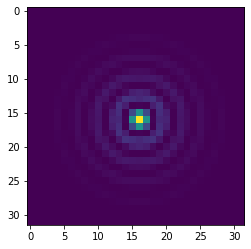

In [12]:
K = 32

plt.imshow(np.abs(focus[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])**2)

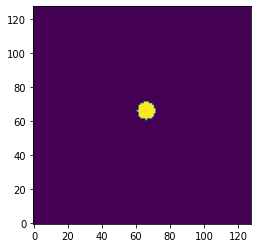

In [6]:
R = np.hypot(x - 0.005, y - 0.005)
pinhole = R < 0.01

plt.imshow(pinhole[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)], origin='lower')

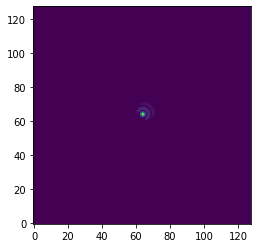

In [7]:
pinhole_exit = pinhole * focus
plt.imshow(np.abs(pinhole_exit[(N//2-K//2):(N//2+K//2), (N//2-K//2):(N//2+K//2)])**2, origin='lower')

In [8]:
detector = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(pinhole_exit)))

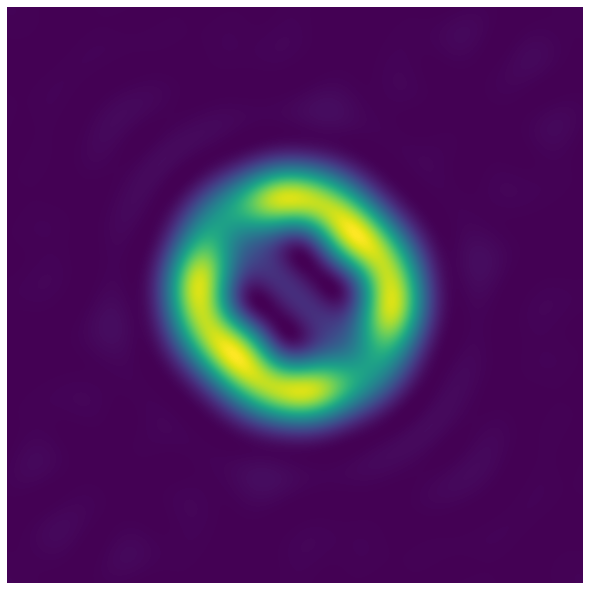

In [9]:
fig = plt.figure(figsize=(8, 8))

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(np.abs(detector)**2, origin='lower')

fig.savefig('../../thesis/chap1/figure/ptychography_detector_example.png')

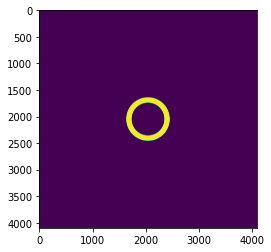

In [18]:
ring_expanded = np.zeros((2*N, 2*N))
ring_expanded[(N//2):(3*N//2), (N//2):(3*N//2)] = ring

focus = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(ring_expanded)))

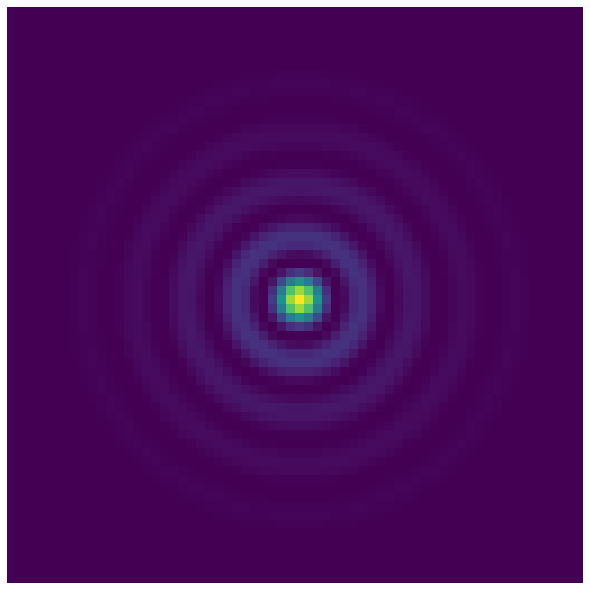

In [23]:
K = 64
fig=plt.figure(figsize=(8, 8))

plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(np.abs(focus[(N-K//2):(N+K//2), (N-K//2):(N+K//2)])**2)

fig.savefig('../../thesis/chap1/figure/focus_example.png')